<a href="https://colab.research.google.com/github/sfmoram/PDI-SM/blob/main/Lab_4_PDI_Ecualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # <font color='darkred'> **Cuarto Laboratorio**

Comprender el efecto de realizar la ecualización de un histograma

   # <font color='darkred'> Importación de Líbrerias

In [ ]:
import numpy as np
from  cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

   # <font color='darkred'> Define las funciones: comoes, imhist y hist_forceuni

<font color="blue">La función **imhist** calcula e imprime el histograma de la imagen.</font>

<font color='blue'> El histograma es una representación gráfica que muestra la distribución de intensidades en una imagen. Es muy útil para analizar el contraste, brillo y otros aspectos de la imagen.

<font color='darkgreen'> La función **hist_forceuni** realiza la "equalización de histograma", pero con un giro. En lugar de simplemente tratar de "estirar" el histograma de la imagen para cubrir todo el rango dinámico, esta función trata de forzar a que el histograma de la imagen resultante sea **uniforme**.

<font color='darkgreen'> La equalización de histograma uniforme tiene el objetivo de producir una imagen de salida donde cada nivel de intensidad tiene aproximadamente el mismo número de píxeles.

<font color='darkgreen'> Cuando usas esta función en una imagen, el resultado será una imagen cuyo histograma tiene una distribución de intensidades más uniforme, lo que puede mejorar el contraste y la visualización en ciertos casos. Sin embargo, hay que tener cuidado, ya que la aplicación de este tipo de técnicas puede llevar a la pérdida de ciertos detalles o características en la imagen original.

In [ ]:
# FUNCIÓN COMOES
def comoes(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

# FUNCIÓN IMHIST
def imhist(X):
  (N,M) = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.figure(figsize=(60,9))
  plt.bar(range(n),h[0:n])
  plt.show()

# FUNCIÓN HIST_FORCEUNI
def hist_forceuni(img):

    img_x = img.copy()
    img_x = 255 * ((img_x - img_x.min()) / (img_x.max() - img_x.min()))

    n, m = img_x.shape
    y = np.zeros((n * m, 1), dtype=np.uint8)
    j = np.argsort(img_x.flatten())
    z = np.zeros((n * m, 1), dtype=np.uint8)
    d = np.int(np.fix((n * m / 256) + 0.5))

    for i in range(255):
        z[i * d:(i + 1) * d] = i * np.ones((d, 1))  # , dtype=np.uint8)
    z[255 * d:n * m] = 255 * np.ones((n * m - 255 * d, 1))  # , dtype=np.uint8)

    y[j] = z
    y = y.reshape(n, m)

    return y

   # <font color='darkred'> Carga la imagen

In [ ]:
!wget https://www.dropbox.com/s/qhm2ckjhrb84br3/nina.png

--2023-02-26 21:28:19--  https://www.dropbox.com/s/qhm2ckjhrb84br3/nina.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/qhm2ckjhrb84br3/nina.png [following]
--2023-02-26 21:28:19--  https://www.dropbox.com/s/raw/qhm2ckjhrb84br3/nina.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef1db4a26f22826314796857e0.dl.dropboxusercontent.com/cd/0/inline/B3Tt7RnITYqTk3fp-kRnlQnK50al8R6qLpiTmzuCZ7Ov04d918pckJFMJlfnA_GUbJMa-dugFNBamtClxtxxMP2VRr_zkV_Hp5MLs3nMherFIc09oTJNf3_44pRlCPsq0LjIDEUrdp-ySeuFtehoV1ZlqdZiJJ_Ruh2CM4mHNzzSgg/file# [following]
--2023-02-26 21:28:20--  https://ucef1db4a26f22826314796857e0.dl.dropboxusercontent.com/cd/0/inline/B3Tt7RnITYqTk3fp-kRnlQnK50al8R6qLpiTmzuCZ7Ov04d918pckJFMJlfnA_GUbJMa-dugFNBamtClxtxxMP2VR

   # <font color='darkred'> Lectura de la imagen

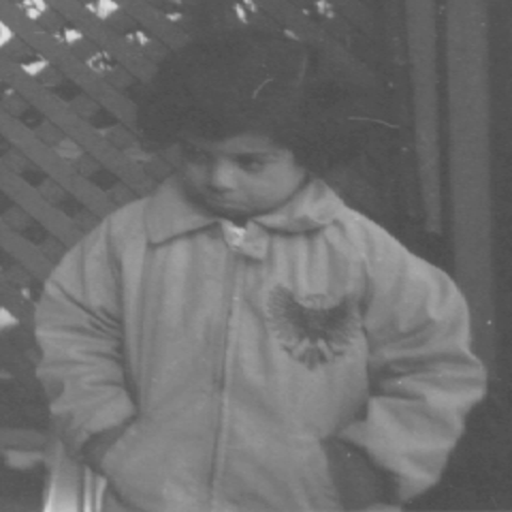

size =  (512, 512)
max  =  224
min  =  74


In [ ]:
X0 = imread('nina.png',0)
cv2_imshow(X0)
comoes(X0)

   # <font color='darkred'> Histograma de la imagen original

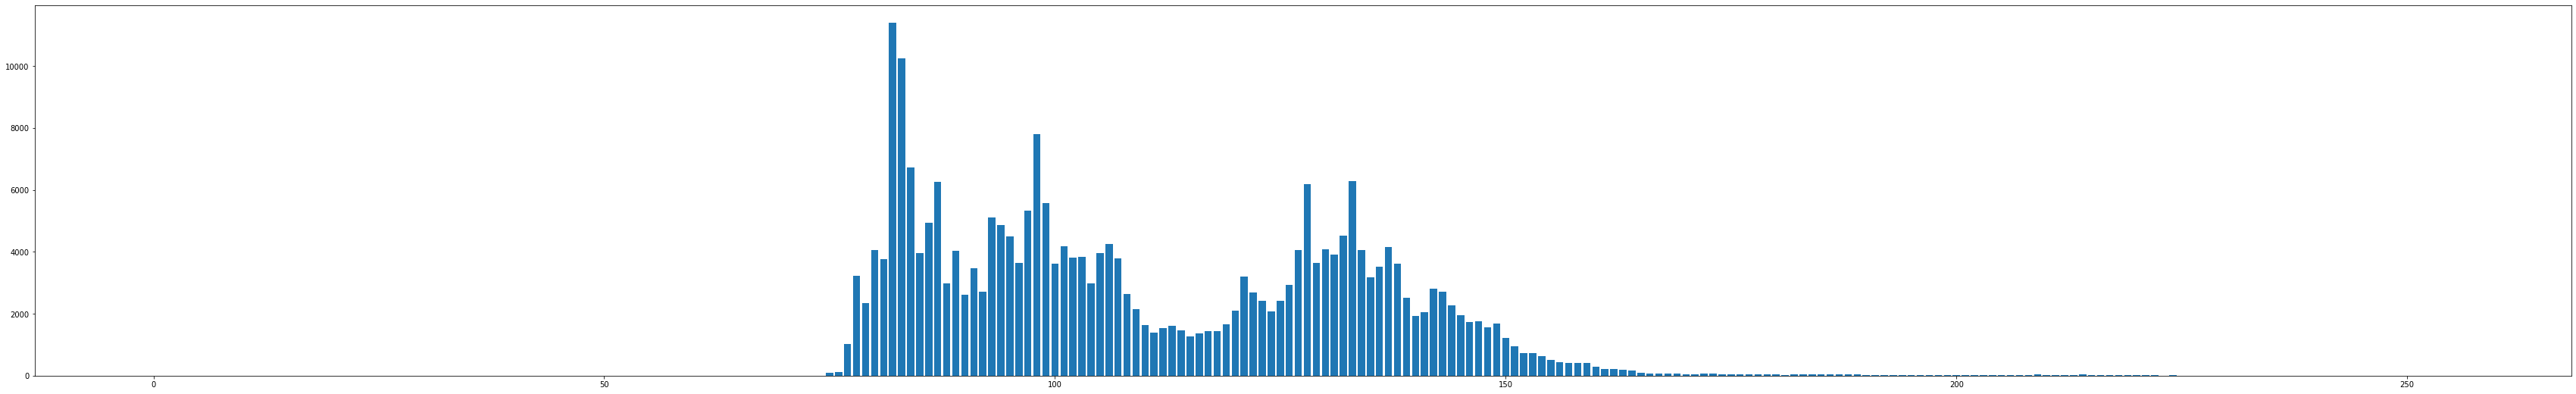

In [ ]:
imhist(X0)

   # <font color='darkred'> Normaliza la imagen X1 de manera que su rango de intensidades se extienda de 0 a 255. X1 es una copia de la imagen original.

size =  (512, 512)
max  =  255
min  =  0


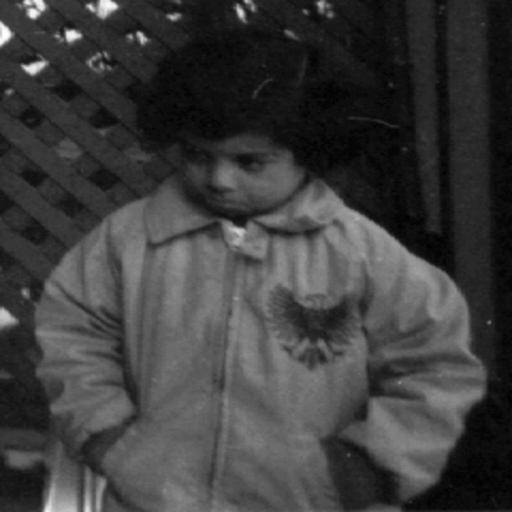

In [ ]:
  X1 = X0.copy()
  X1 = 255 * ((X1 - X1.min()) / (X1.max() - X1.min()))
  X1 = X1.astype(np.uint8)
  comoes(X1)
  cv2_imshow(X1)


   # <font color='darkred'> Histograma de la imagen X1

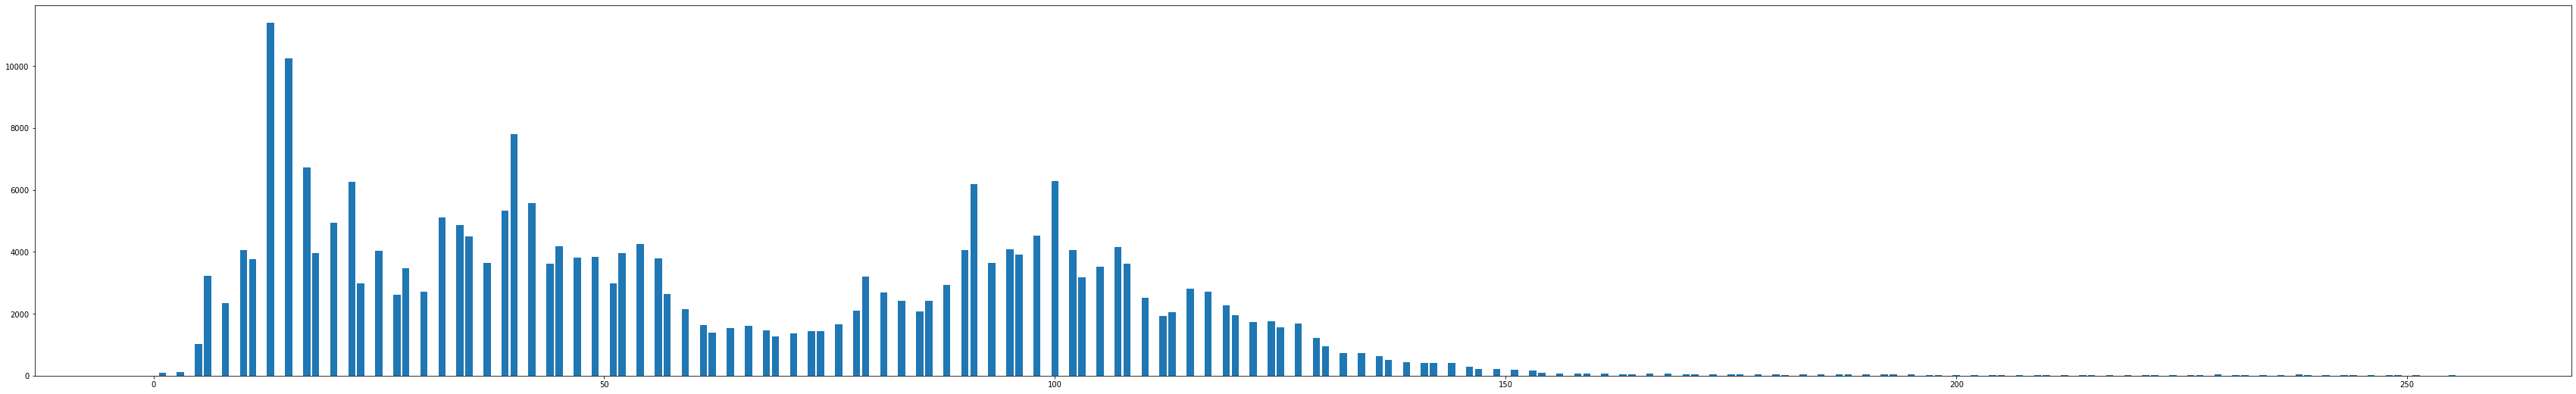

In [ ]:
imhist(X1)

   # <font color='darkred'> Se realiza la equalización del histograma de la imagen original para que tenga una distribución uniforme

size =  (512, 512)
max  =  255
min  =  0


<ipython-input-3-3d995be2b32a>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = np.int(np.fix((n * m / 256) + 0.5))


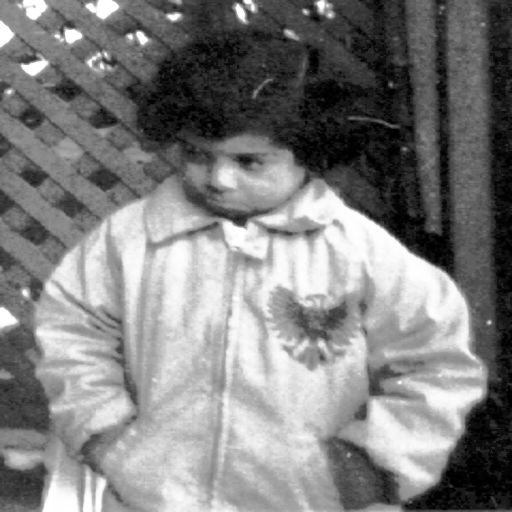

In [ ]:
X2 = hist_forceuni(X0)
comoes(X2)
cv2_imshow(X2)

   # <font color='darkred'> Histograma de la imagen ecualizada de manera uniforme

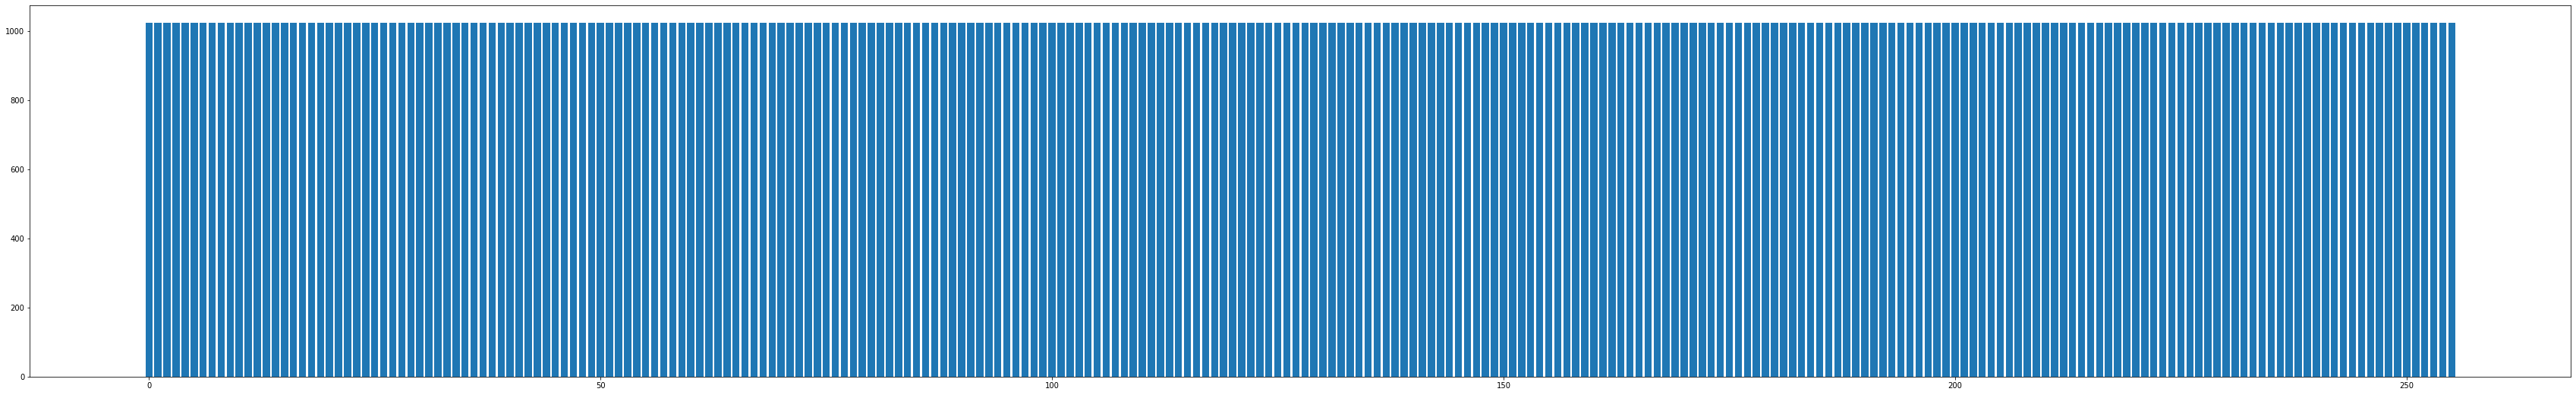

In [ ]:
imhist(X2)

# <font color='darkred'> Otro método:
   
<font color='darkred'>Realiza una equalización de histograma en una imagen utilizando la función equalizeHist de la biblioteca OpenCV

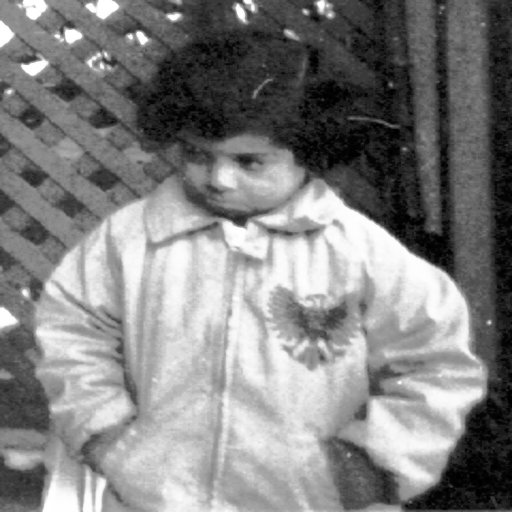

In [ ]:
from cv2 import equalizeHist
X3 = equalizeHist(X0)
cv2_imshow(X3)

# <font color='darkred'> Histograma de la imagen ecualizada

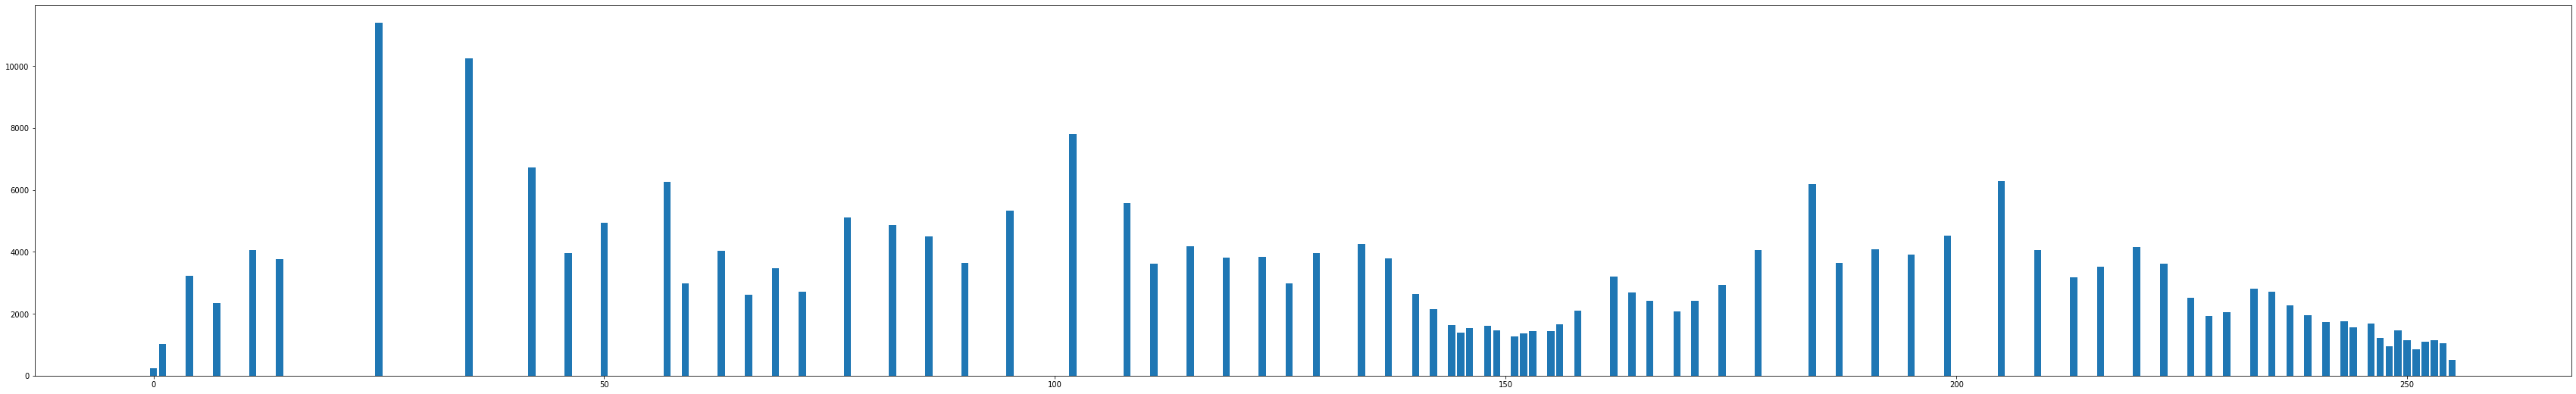

In [ ]:
imhist(X3)

# <font color='darkred'> Combina y muestra varias imágenes en una única imagen

Original, Expandida a los 255 niveles, ecualizada de manera uniforme y ecualizada de manera **no**-uniforme

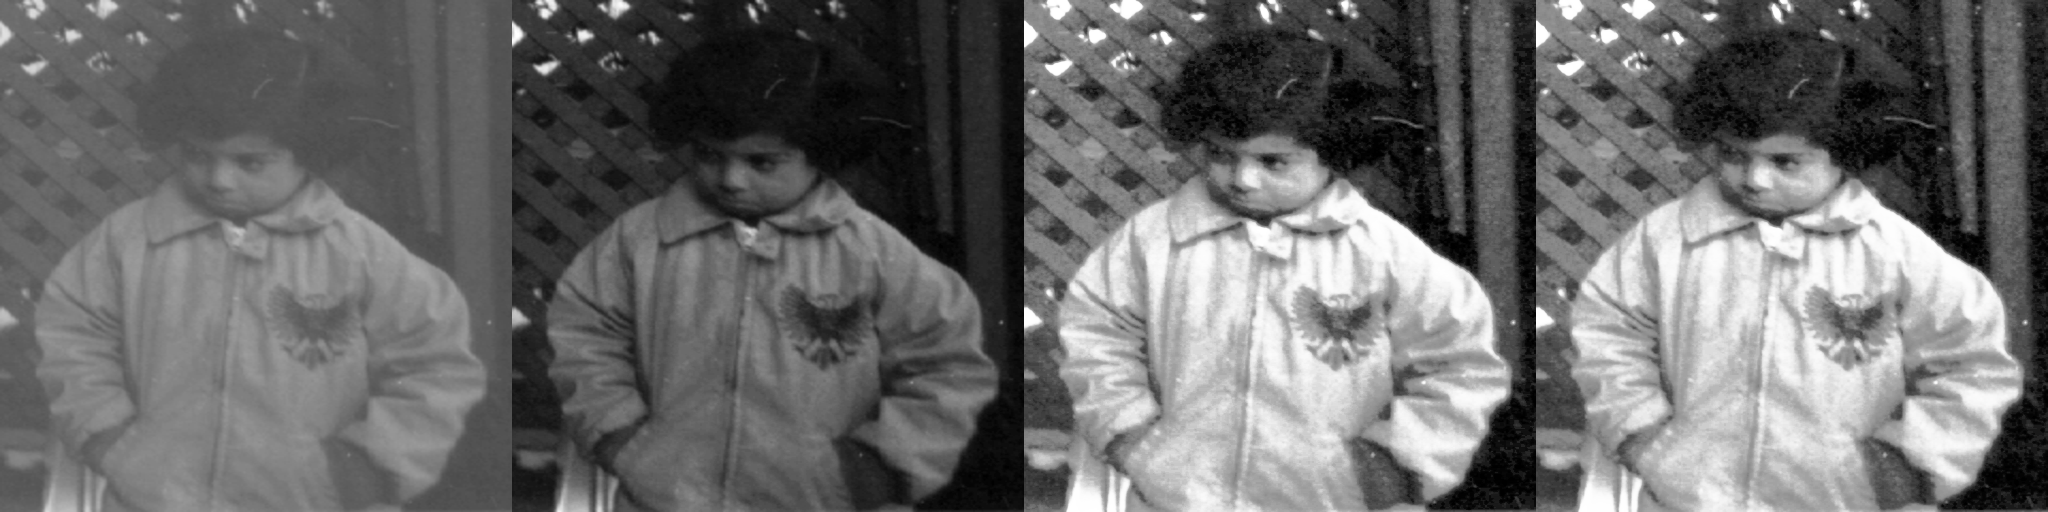

In [ ]:
Y = np.hstack((X0,X1,X2,X3))
cv2_imshow(Y)